In [1]:
import numpy as np
import pickle
from plotnine import *
import pandas as pd 


In [63]:

dict2 = {'0':'\u2080',
         '1':'\u2081',
         '2':'\u2082',
         '3':'\u2083',
         '4':'\u2084',
         '5':'\u2085',
         '6':'\u2086',
         '7':'\u2087',
         '8':'\u2088',
         '9':'\u2089',
         '+':'\u208A',
         '-':'\u208B',
         '=':'\u208C',
         '(':'\u208D',
         ')':'\u208E',
         'a':'\u2090',
         'e':'\u2091',
         'o':'\u2092',
         'x':'\u2093',
         'h':'\u2095',
         'k':'\u2096',
         'l':'\u2097',
         'm':'\u2098',
         'n':'\u2099',
         'p':'\u209A',
         's':'\u209B',
         't':'\u209C'}

def sups(base,x):
    z = '{}'.format(dict1.get(x))
    return base + z

def subs(base,x):
    z = '{}'.format(dict2.get(x))
    return base + z


In [10]:
def getData(idcode,simDuration, condition,data,reps): #sobolPhlo4
    addToName = repr(reps)+"_"+repr(simDuration)+"_"+condition
    if data == "Siev" or data == "Siag":
        clonamesAll = ['Chl','oi','fw1r','k_fw1','\u03C8_t,crit,1',
                  'kchl1', 'kchl2',
                 'kg1','kjmax', '\u03B1','\u03C9',
                 '\u03B30', '\u03B31', '\u03B32','g_ox',
                 'k_ax,x','k_lat,x']
        directory = 'sobolPhoto4/'
        if data == "Siev":
            variablesName = "A) Transpiration rate"
        if data == "Siag":
            variablesName = "B) Assimilation rate"
    else:
        clonamesAll = ['Q10','\u0394\u03C8_o,symplast','\u03C8_p,crit,2','Mout','F_in,max','s_st,min',
                  '\u03B2_meso', 'Mmeso','Y','\u03C1s',
                 'k_ax,st','k_lat,st','Across','km2','km1','r_st,max,org']
        directory = 'sobolPhlo4/'
        variablesName = "C) G_tot,CWlim"
    with open(directory + data+'_R'+addToName+'.pkl','rb') as f:
        allS = pickle.load(f)
        Siev = allS['ST']
        Sievconf = allS['ST_conf']
    df = pd.DataFrame(np.array([Siev]), columns =clonamesAll)
    df_conf = pd.DataFrame(np.array([Sievconf]), columns =clonamesAll)
    dfmean = pd.DataFrame(data=df.mean(),columns=["mean"])
    dfmean["maxst"] = (df + df_conf).max()
    dfmean["minst"] = (df - df_conf).min()
    dfmean['variables']=dfmean.index
    dfmeanEv21w = dfmean
    if condition == "wet":
        dfmeanEv21w['condition'] = "wetter&colder"
    else:
        dfmeanEv21w['condition'] = "drier&warmer"
    if simDuration == 18:
        dfmeanEv21w['simDuration'] = idcode + "18d"
    else:
        dfmeanEv21w['simDuration'] = idcode+ "11d"
    dfmeanEv21w["variable"] = variablesName
    return dfmeanEv21w
    


In [11]:
def getAll4var(variable, id1, id2, reps):
    print(id1 ,8 , "wet",variable,reps[0])
    df1 = getData(id1 ,11 , "wet",variable,reps[0])
    print(id1 ,8 , "dry",variable,reps[1])
    df2 = getData(id1 ,11 , "dry",variable,reps[1])
    print(id2 ,21, "wet",variable,reps[2])
    df3 = getData(id2 ,18, "wet",variable,reps[2])
    print(id2 ,21, "dry",variable,reps[3])
    df4 = getData(id2 ,18, "dry",variable,reps[3])
    dftt = pd.concat([df1, df2,df3,df4])
    return dftt

In [12]:
dftev = getAll4var("Siev","","",[12,12,12,12])
dftag = getAll4var("Siag","","",[12,12,12,12])
dftgr = getAll4var("Sigr","","",[8,8,8,8])

 8 wet Siev 12
 8 dry Siev 12
 21 wet Siev 12
 21 dry Siev 12
 8 wet Siag 12
 8 dry Siag 12
 21 wet Siag 12
 21 dry Siag 12
 8 wet Sigr 8
 8 dry Sigr 8
 21 wet Sigr 8
 21 dry Sigr 8


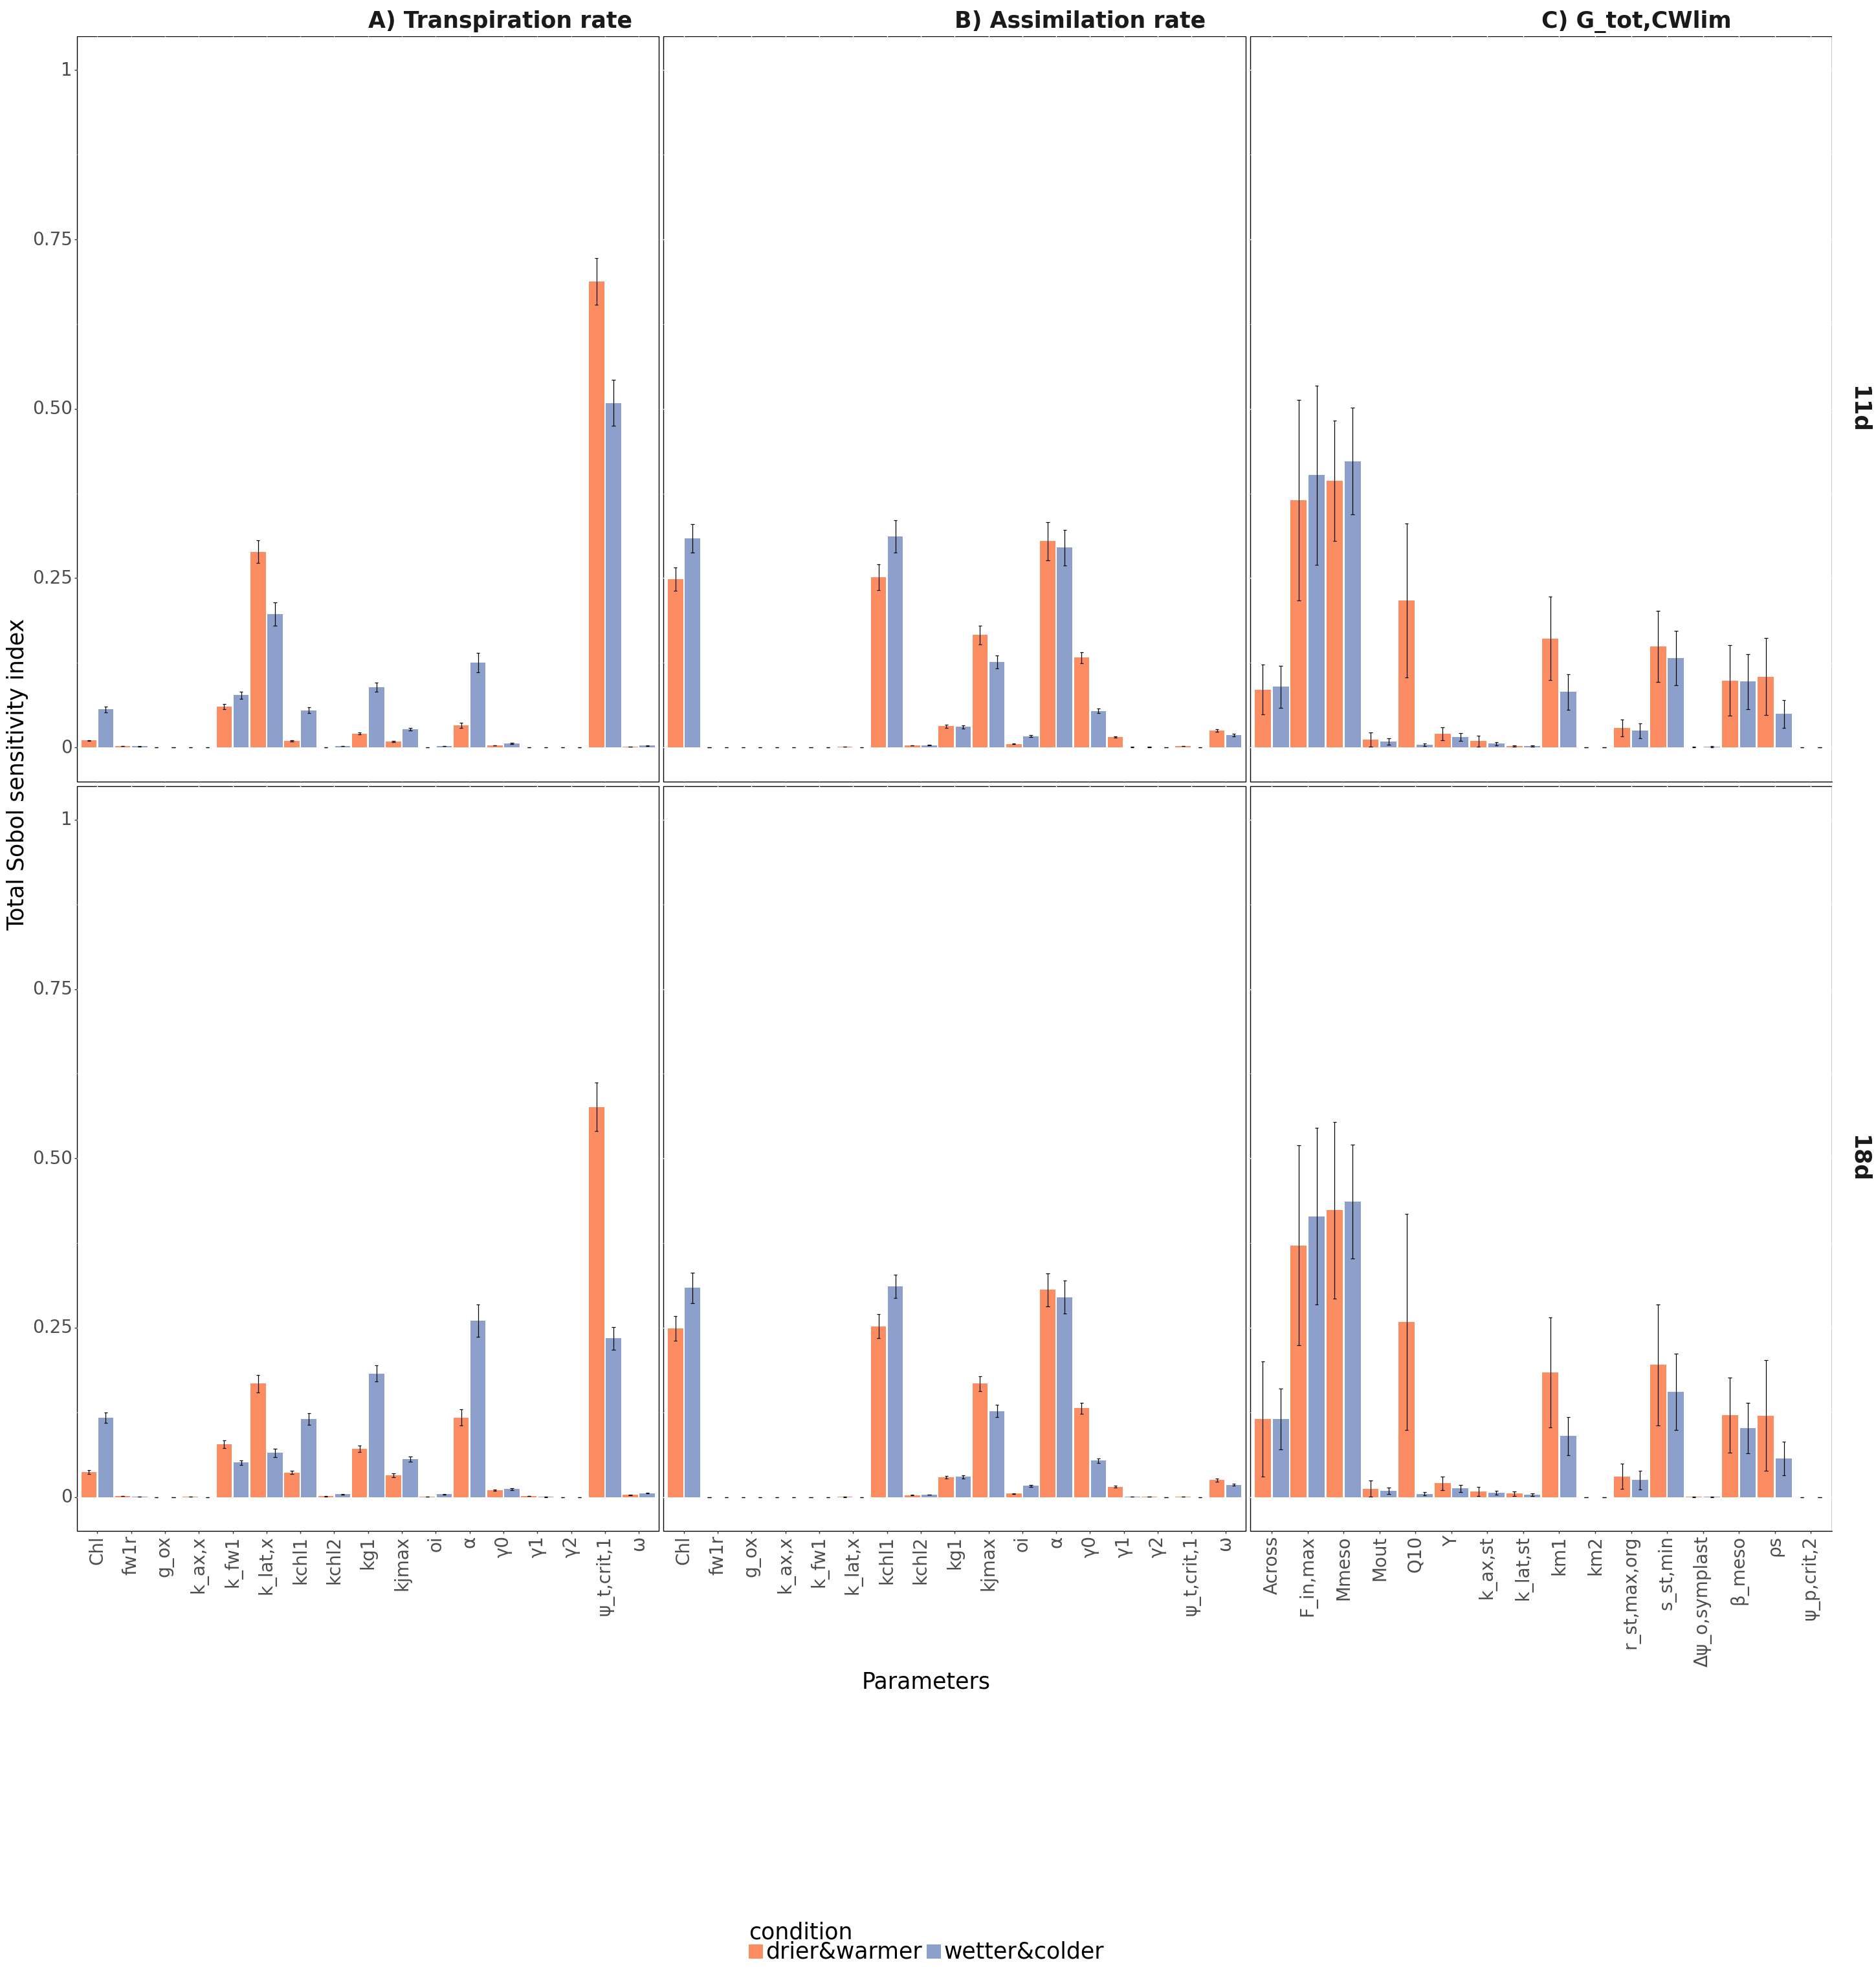

In [18]:
df3 = pd.concat([dftev, dftag,dftgr])

df3['simDuration'] = df3['simDuration'].astype('category')
df3['simDuration'] = df3['simDuration'].cat.reorder_categories(['11d', '18d'])

#from plotnine import options
options.figure_size = (35, 30)
fig, plot =(
    ggplot(df3)  # What data to use
    + aes(x='variables', y= "mean",  fill="condition" )  # What variable to use
    + geom_bar(stat = "identity",position=position_dodge(width=1))  # Geometric object to use for drawing
    + xlab("Parameters")
    + ylim(0,1)
    + facet_grid("simDuration~variable", scales = "free", space = "free")
    + geom_errorbar(aes(ymin="minst", ymax="maxst"),position=position_dodge(width=1),width=.2) 
    + ylab("Total Sobol sensitivity index")
    + scale_fill_manual(name="",
                     values = ["#FC8D62","#8DA0CB"])
     #+ geom_hline(aes(yintercept=0.25))
    +theme(legend_text = element_text( size=25),
        legend_title = element_text( size=25),
        panel_border = element_rect(color = "black", fill = "white", size = 1), 
        legend_position= [0.5,-0.1],
        #legend.direction = "horizontal",
        legend_box = "vertical",
        panel_grid_minor = element_line(colour="white"),
        panel_grid_major = element_line(colour="white"),
        panel_background = element_rect(fill="white", color="black"),
        strip_text_y =element_text( size=25) ,
        axis_text_x =element_text(angle = 90, size=20) ,
        axis_text = element_text( size=20),
        axis_title = element_text( size=25),
        strip_background = element_rect(fill="white"),
        strip_text = element_text(size = 25, hjust = 0,face ="bold")) 
).draw(show=True, return_ggplot=True)
fig.savefig('sobol_isP.png', dpi=300)


In [16]:
print('\N{GREEK SMALL LETTER PI}r\N{SUPERSCRIPT TWO}')
print('k\u2090')

πr²
kₐ


/home/m.giraud/.conda/envs/py38b/lib/python3.8/site-packages/plotnine/layer.py:411: PlotnineWarning: geom_errorbar : Removed 1 rows containing missing values.
/home/m.giraud/.conda/envs/py38b/lib/python3.8/site-packages/plotnine/guides/guides.py:187: PlotnineWarning: Cannot generate legend for the 'color' aesthetic. Make sure you have mapped a variable to it


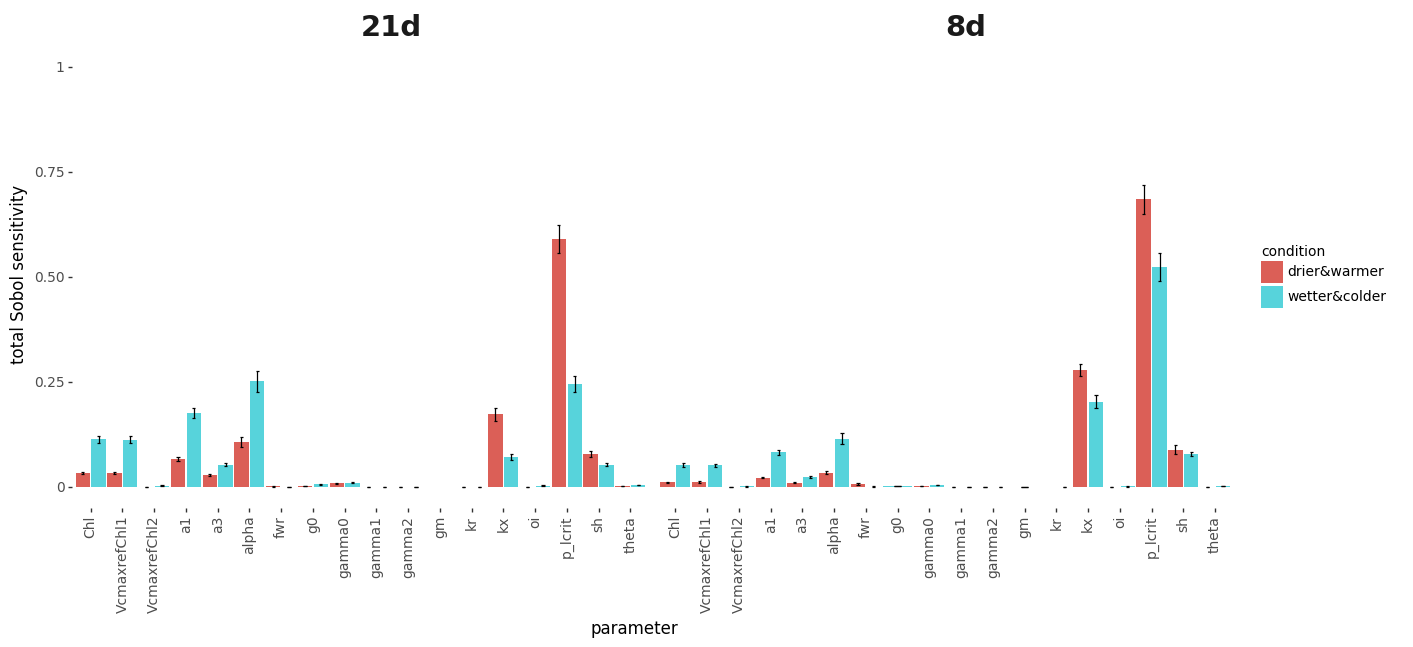

<ggplot: (8735778246870)>

In [23]:

addToName = repr(12)+"_"+repr(18)+"_"+"wet"
with open('sobolPhoto4/Siev_R'+addToName+'.pkl','rb') as f:
    allS = pickle.load(f)
    Siev = allS['ST']
    Sievconf = allS['ST_conf']
#Siev = Siev.T

df = pd.DataFrame(np.array([Siev]), columns =['Chl','oi','fwr','sh','p_lcrit',
              'VcmaxrefChl1', 'VcmaxrefChl2',
             'a1','a3', 'alpha','theta',
             'gamma0', 'gamma1', 'gamma2','g0',
             'kr','kx'])
#Sievconf = Sievconf.T

df_conf = pd.DataFrame(np.array([Sievconf]), columns =['Chl','oi','fwr','sh','p_lcrit',
              'VcmaxrefChl1', 'VcmaxrefChl2',
             'a1','a3', 'alpha','theta',
             'gamma0', 'gamma1', 'gamma2','g0',
             'kr','kx'])
df
dfmean = pd.DataFrame(data=df.mean(),columns=["mean"])
dfmean["maxst"] = (df + df_conf).max()
dfmean["minst"] = (df - df_conf).min()
dfmean['variables']=dfmean.index
dfmeanEv21w = dfmean
dfmeanEv21w['simDuration'] = "21d"
dfmeanEv21w['condition'] = "wetter&colder"

addToName = repr(12)+"_"+repr(18)+"_"+"dry"
with open('sobolPhoto4/Siev_R'+addToName+'.pkl','rb') as f:
    allS = pickle.load(f)
    Siev = allS['ST']
    Sievconf = allS['ST_conf']
#Siev = Siev.T

df = pd.DataFrame(np.array([Siev]), columns =['Chl','oi','fwr','sh','p_lcrit',
              'VcmaxrefChl1', 'VcmaxrefChl2',
             'a1','a3', 'alpha','theta',
             'gamma0', 'gamma1', 'gamma2','g0',
             'kr','kx'])
#Sievconf = Sievconf.T

df_conf = pd.DataFrame(np.array([Sievconf]), columns =['Chl','oi','fwr','sh','p_lcrit',
              'VcmaxrefChl1', 'VcmaxrefChl2',
             'a1','a3', 'alpha','theta',
             'gamma0', 'gamma1', 'gamma2','g0',
             'kr','kx'])
df
dfmean = pd.DataFrame(data=df.mean(),columns=["mean"])
dfmean["maxst"] = (df + df_conf).max()
dfmean["minst"] = (df - df_conf).min()
dfmean['variables']=dfmean.index
dfmeanEv21d = dfmean
dfmeanEv21d['simDuration'] = "21d"
dfmeanEv21d['condition'] = "drier&warmer"


addToName = repr(12)+"_"+repr(11)+"_"+"wet"
with open('sobolPhoto4/Siev_R'+addToName+'.pkl','rb') as f:
    allS = pickle.load(f)
    Siev = allS['ST']
    Sievconf = allS['ST_conf']
#Siev = Siev.T

df = pd.DataFrame(np.array([Siev]), columns =['Chl','oi','fwr','sh','p_lcrit',
              'VcmaxrefChl1', 'VcmaxrefChl2',
             'a1','a3', 'alpha','theta',
             'gamma0', 'gamma1', 'gamma2','g0',
             'kr','kx'])
#Sievconf = Sievconf.T

df_conf = pd.DataFrame(np.array([Sievconf]), columns =['Chl','oi','fwr','sh','p_lcrit',
              'VcmaxrefChl1', 'VcmaxrefChl2',
             'a1','a3', 'alpha','theta',
             'gamma0', 'gamma1', 'gamma2','g0',
             'kr','kx'])
df
dfmean = pd.DataFrame(data=df.mean(),columns=["mean"])
dfmean["maxst"] = (df + df_conf).max()
dfmean["minst"] = (df - df_conf).min()
dfmean['variables']=dfmean.index
dfmeanEv7w = dfmean
dfmeanEv7w['simDuration'] = "8d"
dfmeanEv7w['condition'] = "wetter&colder"


addToName = repr(12)+"_"+repr(11)+"_"+"dry"
with open('sobolPhoto4/Siev_R'+addToName+'.pkl','rb') as f:
    allS = pickle.load(f)
    Siev = allS['ST']
    Sievconf = allS['ST_conf']
#Siev = Siev.T

df = pd.DataFrame(np.array([Siev]), columns =['Chl','oi','fwr','sh','p_lcrit',
              'VcmaxrefChl1', 'VcmaxrefChl2',
             'a1','a3', 'alpha','theta',
             'gamma0', 'gamma1', 'gamma2','gm',
             'kr','kx'])
#Sievconf = Sievconf.T

df_conf = pd.DataFrame(np.array([Sievconf]), columns =['Chl','oi','fwr','sh','p_lcrit',
              'VcmaxrefChl1', 'VcmaxrefChl2',
             'a1','a3', 'alpha','theta',
             'gamma0', 'gamma1', 'gamma2','gm',
             'kr','kx'])
df
dfmean = pd.DataFrame(data=df.mean(),columns=["mean"])
dfmean["maxst"] = (df + df_conf).max()
dfmean["minst"] = (df - df_conf).min()
dfmean['variables']=dfmean.index
dfmeanEv7d = dfmean
dfmeanEv7d['simDuration'] = "8d"
dfmeanEv7d['condition'] = "drier&warmer" #"drier&warmer","wetter&colder"

df3 = pd.concat([dfmeanEv21w, dfmeanEv21d,dfmeanEv7w,dfmeanEv7d])
from plotnine import options
options.figure_size = (15, 6)
(
    ggplot(df3)  # What data to use
    + aes(x='variables', y= "mean",  fill="condition" )  # What variable to use
    + geom_bar(stat = "identity",position=position_dodge(width=1))  # Geometric object to use for drawing
    + xlab("parameter")
    + ylim(0,1)
    + facet_wrap("simDuration")
    + geom_errorbar(aes(ymin="minst", ymax="maxst"),position=position_dodge(width=1),width=.2) 
    + ylab("total Sobol sensitivity")
    + scale_color_manual(name="",
                     values = ["#8DA0CB","#FC8D62"])
    
    +theme(legend_text = element_text( size=10),
        legend_title = element_text( size=10),
        #legend_position="bottom",#c(0.5,0.1),
        #legend.direction = "horizontal",
        legend_box = "vertical",
        panel_grid_minor = element_line(colour="white"),
        panel_grid_major = element_line(colour="white"),
        panel_background = element_rect(fill="white", color="black"),
        strip_text_y =element_text( size=10) ,
        axis_text_x =element_text(angle = 90, size=10) ,
        axis_text = element_text( size=10),
        axis_title = element_text( size=12),
        strip_background = element_rect(fill="white"),
        strip_text = element_text(size = 21, hjust = 0,face ="bold")) 
)
#,strip_placement = "inside"

/tmp/ipykernel_60/2803912311.py:102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


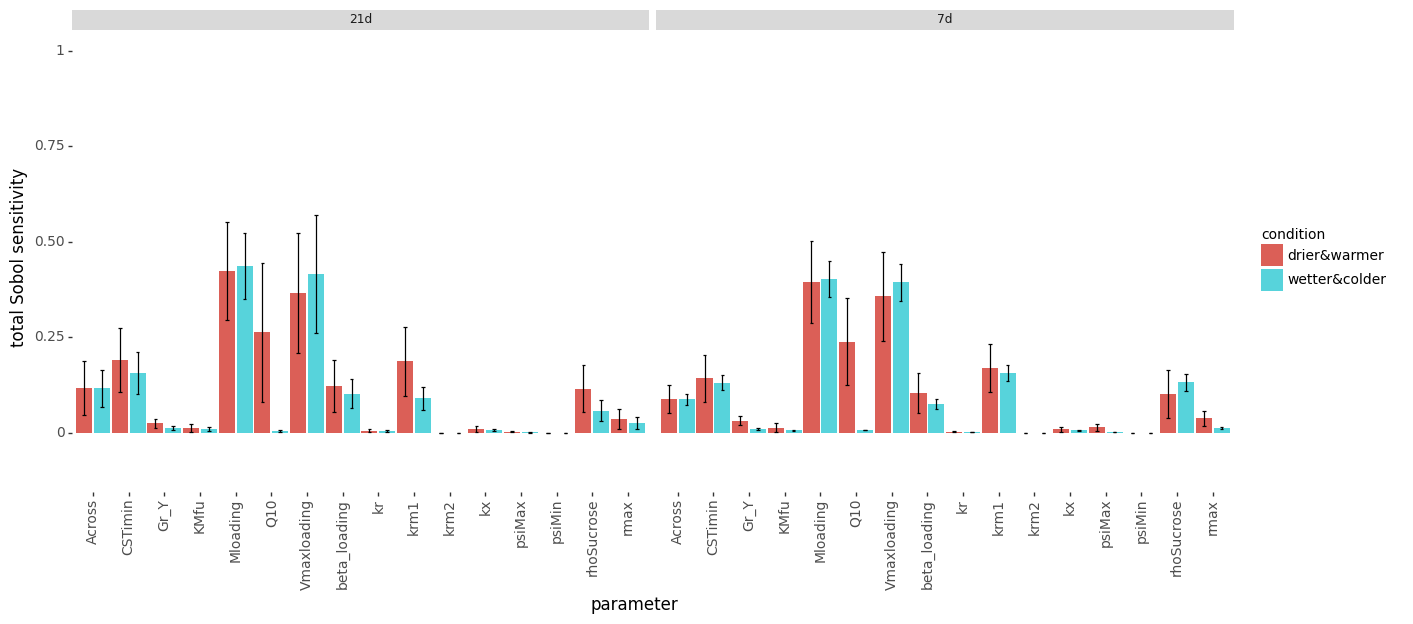

<ggplot: (8735778010447)>

In [26]:
#"wetter&colder"
addToName = repr(8)+"_"+repr(18)+"_"+"wet"
with open('sobolPhlo4/Sigr_R'+addToName+'.pkl','rb') as f:
    allS = pickle.load(f)
    Siev = allS['ST']
    Sievconf = allS['ST_conf']
#Siev = Siev.T

df = pd.DataFrame(np.array([Siev]), columns =['Q10','psiMax','psiMin','KMfu','Vmaxloading','CSTimin',
                  'beta_loading', 'Mloading','Gr_Y','rhoSucrose',
                 'kx','kr','Across','krm2','krm1','rmax'])
#Sievconf = Sievconf.T

df_conf = pd.DataFrame(np.array([Sievconf]), columns =['Q10','psiMax','psiMin','KMfu','Vmaxloading','CSTimin',
                  'beta_loading', 'Mloading','Gr_Y','rhoSucrose',
                 'kx','kr','Across','krm2','krm1','rmax'])
df
dfmean = pd.DataFrame(data=df.mean(),columns=["mean"])
dfmean["maxst"] = (df + df_conf).max()
dfmean["minst"] = (df - df_conf).min()
dfmean['variables']=dfmean.index
dfmeanEv21w = dfmean
dfmeanEv21w['simDuration'] = "21d"
dfmeanEv21w['condition'] = "wetter&colder"

addToName = repr(8)+"_"+repr(18)+"_"+"dry"
with open('sobolPhlo4/Sigr_R'+addToName+'.pkl','rb') as f:
    allS = pickle.load(f)
    Siev = allS['ST']
    Sievconf = allS['ST_conf']
#Siev = Siev.T

df = pd.DataFrame(np.array([Siev]), columns =['Q10','psiMax','psiMin','KMfu','Vmaxloading','CSTimin',
                  'beta_loading', 'Mloading','Gr_Y','rhoSucrose',
                 'kx','kr','Across','krm2','krm1','rmax'])
#Sievconf = Sievconf.T

df_conf = pd.DataFrame(np.array([Sievconf]), columns =['Q10','psiMax','psiMin','KMfu','Vmaxloading','CSTimin',
                  'beta_loading', 'Mloading','Gr_Y','rhoSucrose',
                 'kx','kr','Across','krm2','krm1','rmax'])
df
dfmean = pd.DataFrame(data=df.mean(),columns=["mean"])
dfmean["maxst"] = (df + df_conf).max()
dfmean["minst"] = (df - df_conf).min()
dfmean['variables']=dfmean.index
dfmeanEv21d = dfmean
dfmeanEv21d['simDuration'] = "21d"
dfmeanEv21d['condition'] = "drier&warmer"


addToName = repr(11)+"_"+repr(8)+"_"+"wet"
with open('sobolPhlo4/Sigr_R'+addToName+'.pkl','rb') as f:
    allS = pickle.load(f)
    Siev = allS['ST']
    Sievconf = allS['ST_conf']
#Siev = Siev.T

df = pd.DataFrame(np.array([Siev]), columns =['Q10','psiMax','psiMin','KMfu','Vmaxloading','CSTimin',
                  'beta_loading', 'Mloading','Gr_Y','rhoSucrose',
                 'kx','kr','Across','krm2','krm1','rmax'])
#Sievconf = Sievconf.T

df_conf = pd.DataFrame(np.array([Sievconf]), columns =['Q10','psiMax','psiMin','KMfu','Vmaxloading','CSTimin',
                  'beta_loading', 'Mloading','Gr_Y','rhoSucrose',
                 'kx','kr','Across','krm2','krm1','rmax'])
df
dfmean = pd.DataFrame(data=df.mean(),columns=["mean"])
dfmean["maxst"] = (df + df_conf).max()
dfmean["minst"] = (df - df_conf).min()
dfmean['variables']=dfmean.index
dfmeanEv7w = dfmean
dfmeanEv7w['simDuration'] = "7d"
dfmeanEv7w['condition'] = "wetter&colder"


addToName = repr(8)+"_"+repr(11)+"_"+"dry"
with open('sobolPhlo4/Sigr_R'+addToName+'.pkl','rb') as f:
    allS = pickle.load(f)
    Siev = allS['ST']
    Sievconf = allS['ST_conf']
#Siev = Siev.T

df = pd.DataFrame(np.array([Siev]), columns =['Q10','psiMax','psiMin','KMfu','Vmaxloading','CSTimin',
                  'beta_loading', 'Mloading','Gr_Y','rhoSucrose',
                 'kx','kr','Across','krm2','krm1','rmax'])
#Sievconf = Sievconf.T

df_conf = pd.DataFrame(np.array([Sievconf]), columns =['Q10','psiMax','psiMin','KMfu','Vmaxloading','CSTimin',
                  'beta_loading', 'Mloading','Gr_Y','rhoSucrose',
                 'kx','kr','Across','krm2','krm1','rmax'])
df
dfmean = pd.DataFrame(data=df.mean(),columns=["mean"])
dfmean["maxst"] = (df + df_conf).max()
dfmean["minst"] = (df - df_conf).min()
dfmean['variables']=dfmean.index
dfmeanEv7d = dfmean
dfmeanEv7d['simDuration'] = "7d"
dfmeanEv7d['condition'] = "drier&warmer"

df3 = pd.concat([dfmeanEv21w, dfmeanEv21d,dfmeanEv7w,dfmeanEv7d])

df3[df3["minst"]<0]["minst"]=0
from plotnine import options
options.figure_size = (15, 6)
(
    ggplot(df3)  # What data to use
    + aes(x='variables', y= "mean",  fill="condition" )  # What variable to use
    + geom_bar(stat = "identity",position=position_dodge(width=1))  # Geometric object to use for drawing
    + xlab("parameter")
    + ylim(-0.1,1)
    + facet_wrap("simDuration")
    + geom_errorbar(aes(ymin="minst", ymax="maxst"),position=position_dodge(width=1),width=.2) 
    + ylab("total Sobol sensitivity")
    
    +theme(legend_text = element_text( size=10),
        legend_title = element_text( size=10),
        #legend_position="bottom",#c(0.5,0.1),
        #legend.direction = "horizontal",
        legend_box = "vertical",
        panel_grid_minor = element_line(colour="white"),
        panel_grid_major = element_line(colour="white"),
        panel_background = element_rect(fill="white", color="black"),
        strip_text_y =element_text( size=10) ,
        axis_text_x =element_text(angle = 90, size=10) ,
        axis_text = element_text( size=10),
        axis_title = element_text( size=12)) 
)

In [84]:
df4 = df3
df4[df4["minst"]<0]["minst"]

psiMax   -2.198969e-04
psiMin   -5.729747e-05
psiMax   -8.756242e-05
kr       -6.355252e-05
rmax     -2.053915e-02
Gr_Y     -2.733745e-19
Name: minst, dtype: float64

/home/m.giraud/.conda/envs/py38b/lib/python3.8/site-packages/plotnine/layer.py:411: PlotnineWarning: geom_errorbar : Removed 6 rows containing missing values.


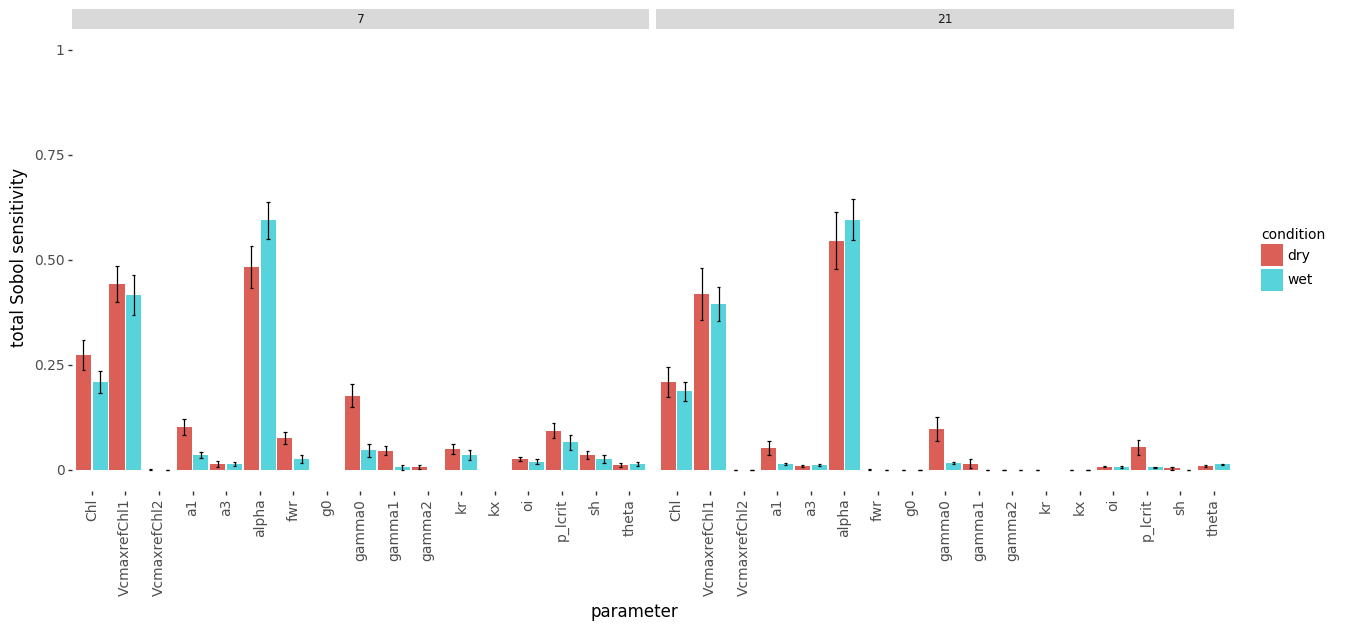

<ggplot: (8732985057699)>

In [38]:


addToName = repr(11)+"_"+repr(21)+"_"+"wet"
with open('sobolPhoto4/Siag_R'+addToName+'.pkl','rb') as f:
    allS = pickle.load(f)
    Siev = allS['ST']
    Sievconf = allS['ST_conf']
#Siev = Siev.T

df = pd.DataFrame(np.array([Siev]), columns =['Chl','oi','fwr','sh','p_lcrit',
              'VcmaxrefChl1', 'VcmaxrefChl2',
             'a1','a3', 'alpha','theta',
             'gamma0', 'gamma1', 'gamma2','g0',
             'kr','kx'])
#Sievconf = Sievconf.T

df_conf = pd.DataFrame(np.array([Sievconf]), columns =['Chl','oi','fwr','sh','p_lcrit',
              'VcmaxrefChl1', 'VcmaxrefChl2',
             'a1','a3', 'alpha','theta',
             'gamma0', 'gamma1', 'gamma2','g0',
             'kr','kx'])
df
dfmean = pd.DataFrame(data=df.mean(),columns=["mean"])
dfmean["maxst"] = (df + df_conf).max()
dfmean["minst"] = (df - df_conf).min()
dfmean['variables']=dfmean.index
dfmeanEv21w = dfmean
dfmeanEv12w['simDuration'] = "21d"
dfmeanEv21w['condition'] = "wetter&colder"

addToName = repr(10)+"_"+repr(21)+"_"+"dry"
with open('sobolPhoto4/Siag_R'+addToName+'.pkl','rb') as f:
    allS = pickle.load(f)
    Siev = allS['ST']
    Sievconf = allS['ST_conf']
#Siev = Siev.T

df = pd.DataFrame(np.array([Siev]), columns =['Chl','oi','fwr','sh','p_lcrit',
              'VcmaxrefChl1', 'VcmaxrefChl2',
             'a1','a3', 'alpha','theta',
             'gamma0', 'gamma1', 'gamma2','g0',
             'kr','kx'])
#Sievconf = Sievconf.T

df_conf = pd.DataFrame(np.array([Sievconf]), columns =['Chl','oi','fwr','sh','p_lcrit',
              'VcmaxrefChl1', 'VcmaxrefChl2',
             'a1','a3', 'alpha','theta',
             'gamma0', 'gamma1', 'gamma2','g0',
             'kr','kx'])
df
dfmean = pd.DataFrame(data=df.mean(),columns=["mean"])
dfmean["maxst"] = (df + df_conf).max()
dfmean["minst"] = (df - df_conf).min()
dfmean['variables']=dfmean.index
dfmeanEv21d = dfmean
dfmeanEv12d['simDuration'] = "21d"
dfmeanEv21d['condition'] = "drier&warmer"


addToName = repr(11)+"_"+repr(7)+"_"+"wet"
with open('sobolPhoto4/Siag_R'+addToName+'.pkl','rb') as f:
    allS = pickle.load(f)
    Siev = allS['ST']
    Sievconf = allS['ST_conf']
#Siev = Siev.T

df = pd.DataFrame(np.array([Siev]), columns =['Chl','oi','fwr','sh','p_lcrit',
              'VcmaxrefChl1', 'VcmaxrefChl2',
             'a1','a3', 'alpha','theta',
             'gamma0', 'gamma1', 'gamma2','g0',
             'kr','kx'])
#Sievconf = Sievconf.T

df_conf = pd.DataFrame(np.array([Sievconf]), columns =['Chl','oi','fwr','sh','p_lcrit',
              'VcmaxrefChl1', 'VcmaxrefChl2',
             'a1','a3', 'alpha','theta',
             'gamma0', 'gamma1', 'gamma2','g0',
             'kr','kx'])
df
dfmean = pd.DataFrame(data=df.mean(),columns=["mean"])
dfmean["maxst"] = (df + df_conf).max()
dfmean["minst"] = (df - df_conf).min()
dfmean['variables']=dfmean.index
dfmeanEv7w = dfmean
dfmeanEv7w['simDuration'] = "7d"
dfmeanEv7w['condition'] ="wetter&colder"


addToName = repr(11)+"_"+repr(7)+"_"+"dry"
with open('sobolPhoto4/Siag_R'+addToName+'.pkl','rb') as f:
    allS = pickle.load(f)
    Siev = allS['ST']
    Sievconf = allS['ST_conf']
#Siev = Siev.T

df = pd.DataFrame(np.array([Siev]), columns =['Chl','oi','fwr','sh','p_lcrit',
              'VcmaxrefChl1', 'VcmaxrefChl2',
             'a1','a3', 'alpha','theta',
             'gamma0', 'gamma1', 'gamma2','g0',
             'kr','kx'])
#Sievconf = Sievconf.T

df_conf = pd.DataFrame(np.array([Sievconf]), columns =['Chl','oi','fwr','sh','p_lcrit',
              'VcmaxrefChl1', 'VcmaxrefChl2',
             'a1','a3', 'alpha','theta',
             'gamma0', 'gamma1', 'gamma2','g0',
             'kr','kx'])
df
dfmean = pd.DataFrame(data=df.mean(),columns=["mean"])
dfmean["maxst"] = (df + df_conf).max()
dfmean["minst"] = (df - df_conf).min()
dfmean['variables']=dfmean.index
dfmeanEv7d = dfmean
dfmeanEv7d['simDuration'] = "7d"
dfmeanEv7d['condition'] = "drier&warmer"

df3 = pd.concat([dfmeanEv21w, dfmeanEv21d,dfmeanEv7w,dfmeanEv7d])

NameError: name 'dfmeanEv12w' is not defined

/home/m.giraud/.conda/envs/py38b/lib/python3.8/site-packages/plotnine/layer.py:411: PlotnineWarning: geom_errorbar : Removed 6 rows containing missing values.


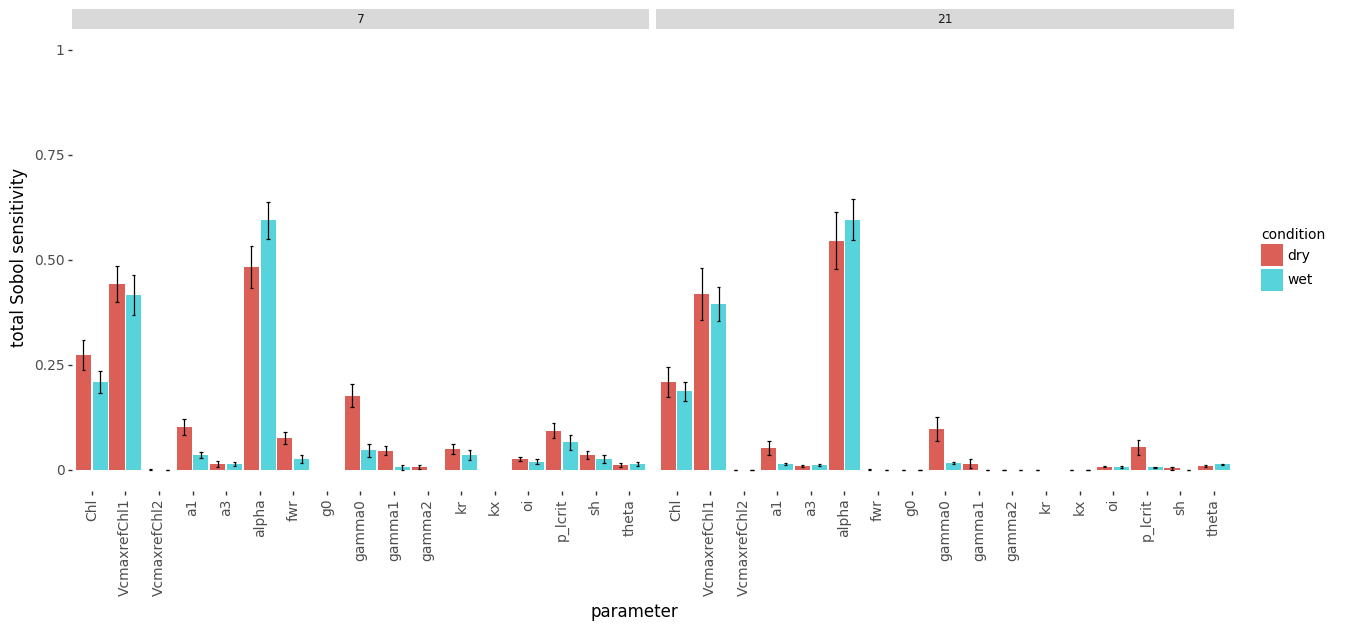

<ggplot: (8732984870440)>

In [64]:
options.figure_size = (15, 6)
(
    ggplot(df3)  # What data to use
    + aes(x='variables', y= "mean",  fill="condition" )  # What variable to use
    + geom_bar(stat = "identity",position=position_dodge(width=1))  # Geometric object to use for drawing
    + xlab("parameter")
    + ylim(0,1)
    + facet_wrap("simDuration")
    + geom_errorbar(aes(ymin="minst", ymax="maxst"),position=position_dodge(width=1),width=.2) 
    + ylab("total Sobol sensitivity")
    
    +theme(legend_text = element_text( size=10),
        legend_title = element_text( size=10),
        #legend_position="bottom",#c(0.5,0.1),
        #legend.direction = "horizontal",
        legend_box = "vertical",
        panel_grid_minor = element_line(colour="white"),
        panel_grid_major = element_line(colour="white"),
        panel_background = element_rect(fill="white", color="black"),
        strip_text_y =element_text( size=10) ,
        axis_text_x =element_text(angle = 90, size=10) ,
        axis_text = element_text( size=10),
        axis_title = element_text( size=12)) 
)

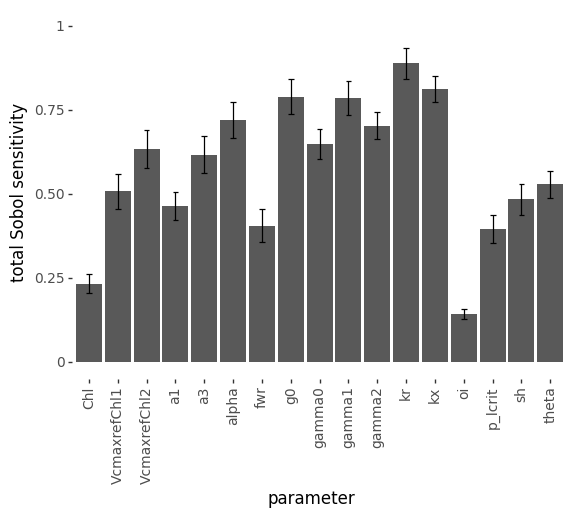

<ggplot: (8732988944409)>

In [19]:

addToName = repr(11)+"_"+repr(21)+"_"+"wet"
with open('sobolPhoto4/Siev_R'+addToName+'.pkl','rb') as f:
    allS = pickle.load(f)
    Siev = allS['ST']
    Sievconf = allS['ST_conf']
#Siev = Siev.T

df = pd.DataFrame(np.array([Siev]), columns =['Chl','oi','fwr','sh','p_lcrit',
              'VcmaxrefChl1', 'VcmaxrefChl2',
             'a1','a3', 'alpha','theta',
             'gamma0', 'gamma1', 'gamma2','g0',
             'kr','kx'])
#Sievconf = Sievconf.T

df_conf = pd.DataFrame(np.array([Sievconf]), columns =['Chl','oi','fwr','sh','p_lcrit',
              'VcmaxrefChl1', 'VcmaxrefChl2',
             'a1','a3', 'alpha','theta',
             'gamma0', 'gamma1', 'gamma2','g0',
             'kr','kx'])
df
dfmean = pd.DataFrame(data=df.mean(),columns=["mean"])
dfmean["maxst"] = (df + df_conf).max()
dfmean["minst"] = (df - df_conf).min()
dfmean['variables']=dfmean.index
dfmeanEv = dfmean
dfmeanEv


(
    ggplot(dfmeanEv)  # What data to use
    + aes(x='variables', y= "mean" )  # What variable to use
    + geom_bar(stat = "identity")  # Geometric object to use for drawing
    + xlab("parameter")
    + ylim(0,1)
    + geom_errorbar(aes(ymin="minst", ymax="maxst"), width=.2) 
    + ylab("total Sobol sensitivity")
    +theme(legend_text = element_text( size=10),
        legend_title = element_text( size=10),
        legend_position="bottom",#c(0.5,0.1),
        #legend.direction = "horizontal",
        legend_box = "vertical",
        panel_grid_minor = element_line(colour="white"),
        panel_grid_major = element_line(colour="white"),
        panel_background = element_rect(fill="white", color="black"),
        strip_text_y =element_text( size=10) ,
        axis_text_x =element_text(angle = 90, size=10) ,
        axis_text = element_text( size=10),
        axis_title = element_text( size=12)) 
)

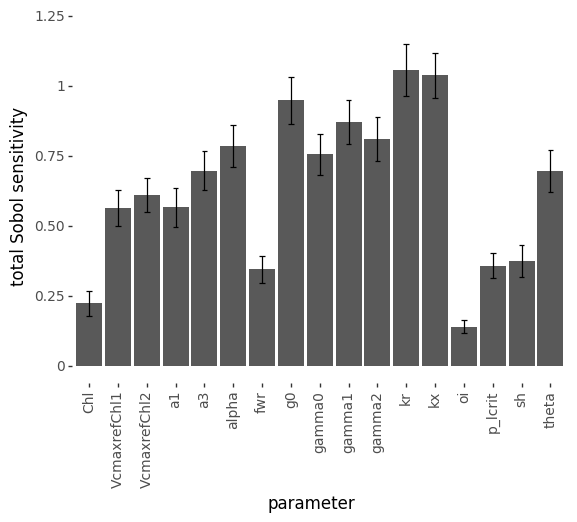

<ggplot: (8732988243056)>

In [30]:

addToName = repr(10)+"_"+repr(21)+"_"+"dry"
with open('sobolPhoto4/Siev_R'+addToName+'.pkl','rb') as f:
    allS = pickle.load(f)
    Siev = allS['ST']
    Sievconf = allS['ST_conf']
#Siev = Siev.T

df = pd.DataFrame(np.array([Siev]), columns =['Chl','oi','fwr','sh','p_lcrit',
              'VcmaxrefChl1', 'VcmaxrefChl2',
             'a1','a3', 'alpha','theta',
             'gamma0', 'gamma1', 'gamma2','g0',
             'kr','kx'])
#Sievconf = Sievconf.T

df_conf = pd.DataFrame(np.array([Sievconf]), columns =['Chl','oi','fwr','sh','p_lcrit',
              'VcmaxrefChl1', 'VcmaxrefChl2',
             'a1','a3', 'alpha','theta',
             'gamma0', 'gamma1', 'gamma2','g0',
             'kr','kx'])
df
dfmean = pd.DataFrame(data=df.mean(),columns=["mean"])
dfmean["maxst"] = (df + df_conf).max()
dfmean["minst"] = (df - df_conf).min()
dfmean['variables']=dfmean.index
dfmeanEv = dfmean
dfmeanEv


(
    ggplot(dfmeanEv)  # What data to use
    + aes(x='variables', y= "mean" )  # What variable to use
    + geom_bar(stat = "identity")  # Geometric object to use for drawing
    + xlab("parameter")
    + ylim(0,1.2)
    + geom_errorbar(aes(ymin="minst", ymax="maxst"), width=.2) 
    + ylab("total Sobol sensitivity")
    +theme(legend_text = element_text( size=10),
        legend_title = element_text( size=10),
        legend_position="bottom",#c(0.5,0.1),
        #legend.direction = "horizontal",
        legend_box = "vertical",
        panel_grid_minor = element_line(colour="white"),
        panel_grid_major = element_line(colour="white"),
        panel_background = element_rect(fill="white", color="black"),
        strip_text_y =element_text( size=10) ,
        axis_text_x =element_text(angle = 90, size=10) ,
        axis_text = element_text( size=10),
        axis_title = element_text( size=12)) 
)

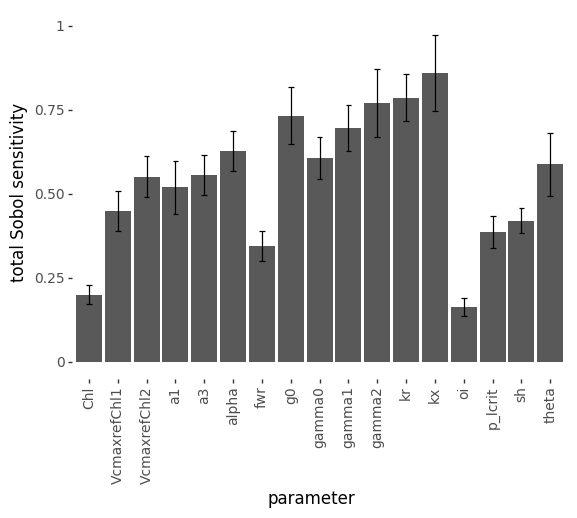

<ggplot: (8732988949011)>

In [20]:

addToName = repr(11)+"_"+repr(7)+"_"+"wet"
with open('sobolPhoto4/Siev_R'+addToName+'.pkl','rb') as f:
    allS = pickle.load(f)
    Siev = allS['ST']
    Sievconf = allS['ST_conf']
#Siev = Siev.T

df = pd.DataFrame(np.array([Siev]), columns =['Chl','oi','fwr','sh','p_lcrit',
              'VcmaxrefChl1', 'VcmaxrefChl2',
             'a1','a3', 'alpha','theta',
             'gamma0', 'gamma1', 'gamma2','g0',
             'kr','kx'])
#Sievconf = Sievconf.T

df_conf = pd.DataFrame(np.array([Sievconf]), columns =['Chl','oi','fwr','sh','p_lcrit',
              'VcmaxrefChl1', 'VcmaxrefChl2',
             'a1','a3', 'alpha','theta',
             'gamma0', 'gamma1', 'gamma2','g0',
             'kr','kx'])
dfmean = pd.DataFrame(data=df.mean(),columns=["mean"])
dfmean["maxst"] = (df + df_conf).max()
dfmean["minst"] = (df - df_conf).min()
dfmean['variables']=dfmean.index
dfmeanEv = dfmean
dfmeanEv


(
    ggplot(dfmeanEv)  # What data to use
    + aes(x='variables', y= "mean" )  # What variable to use
    + geom_bar(stat = "identity")  # Geometric object to use for drawing
    + xlab("parameter")
    + ylim(0,1)
    + geom_errorbar(aes(ymin="minst", ymax="maxst"), width=.2) 
    + ylab("total Sobol sensitivity")
    +theme(legend_text = element_text( size=10),
        legend_title = element_text( size=10),
        legend_position="bottom",#c(0.5,0.1),
        #legend.direction = "horizontal",
        legend_box = "vertical",
        panel_grid_minor = element_line(colour="white"),
        panel_grid_major = element_line(colour="white"),
        panel_background = element_rect(fill="white", color="black"),
        strip_text_y =element_text( size=10) ,
        axis_text_x =element_text(angle = 90, size=10) ,
        axis_text = element_text( size=10),
        axis_title = element_text( size=12)) 
)

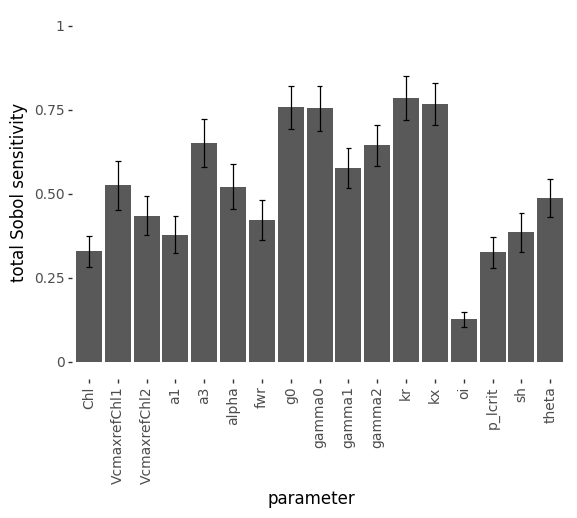

<ggplot: (8732988824977)>

In [22]:

addToName = repr(11)+"_"+repr(7)+"_"+"dry"
with open('sobolPhoto4/Siev_R'+addToName+'.pkl','rb') as f:
    allS = pickle.load(f)
    Siev = allS['ST']
    Sievconf = allS['ST_conf']
#Siev = Siev.T

df = pd.DataFrame(np.array([Siev]), columns =['Chl','oi','fwr','sh','p_lcrit',
              'VcmaxrefChl1', 'VcmaxrefChl2',
             'a1','a3', 'alpha','theta',
             'gamma0', 'gamma1', 'gamma2','g0',
             'kr','kx'])
#Sievconf = Sievconf.T

df_conf = pd.DataFrame(np.array([Sievconf]), columns =['Chl','oi','fwr','sh','p_lcrit',
              'VcmaxrefChl1', 'VcmaxrefChl2',
             'a1','a3', 'alpha','theta',
             'gamma0', 'gamma1', 'gamma2','g0',
             'kr','kx'])
dfmean = pd.DataFrame(data=df.mean(),columns=["mean"])
dfmean["maxst"] = (df + df_conf).max()
dfmean["minst"] = (df - df_conf).min()
dfmean['variables']=dfmean.index
dfmeanEv = dfmean
dfmeanEv


(
    ggplot(dfmeanEv)  # What data to use
    + aes(x='variables', y= "mean" )  # What variable to use
    + geom_bar(stat = "identity")  # Geometric object to use for drawing
    + xlab("parameter")
    +ylim(0,1)
    + geom_errorbar(aes(ymin="minst", ymax="maxst"), width=.2) 
    + ylab("total Sobol sensitivity")
    +theme(legend_text = element_text( size=10),
        legend_title = element_text( size=10),
        legend_position="bottom",#c(0.5,0.1),
        #legend.direction = "horizontal",
        legend_box = "vertical",
        panel_grid_minor = element_line(colour="white"),
        panel_grid_major = element_line(colour="white"),
        panel_background = element_rect(fill="white", color="black"),
        strip_text_y =element_text( size=10) ,
        axis_text_x =element_text(angle = 90, size=10) ,
        axis_text = element_text( size=10),
        axis_title = element_text( size=12)) 
)

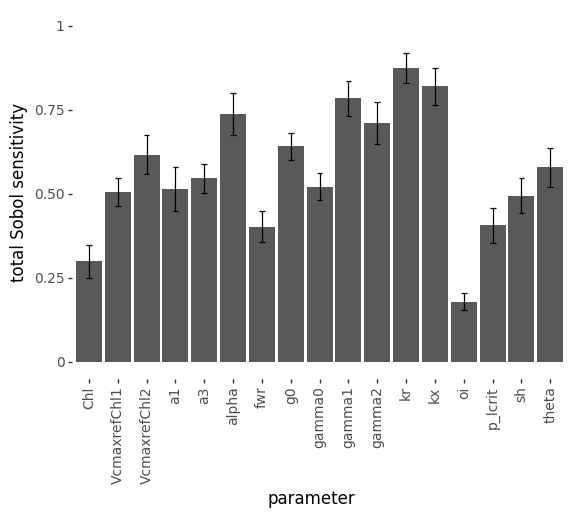

<ggplot: (8732988741006)>

In [24]:

addToName = repr(11)+"_"+repr(21)+"_"+"wet"
with open('sobolPhoto4/Siag_R'+addToName+'.pkl','rb') as f:
    allS = pickle.load(f)
    Siev = allS['ST']
    Sievconf = allS['ST_conf']
#Siev = Siev.T

df = pd.DataFrame(np.array([Siev]), columns =['Chl','oi','fwr','sh','p_lcrit',
              'VcmaxrefChl1', 'VcmaxrefChl2',
             'a1','a3', 'alpha','theta',
             'gamma0', 'gamma1', 'gamma2','g0',
             'kr','kx'])
#Sievconf = Sievconf.T

df_conf = pd.DataFrame(np.array([Sievconf]), columns =['Chl','oi','fwr','sh','p_lcrit',
              'VcmaxrefChl1', 'VcmaxrefChl2',
             'a1','a3', 'alpha','theta',
             'gamma0', 'gamma1', 'gamma2','g0',
             'kr','kx'])
dfmean = pd.DataFrame(data=df.mean(),columns=["mean"])
dfmean["maxst"] = (df + df_conf).max()
dfmean["minst"] = (df - df_conf).min()
dfmean['variables']=dfmean.index
dfmeanEv = dfmean
dfmeanEv


(
    ggplot(dfmeanEv)  # What data to use
    + aes(x='variables', y= "mean" )  # What variable to use
    + geom_bar(stat = "identity")  # Geometric object to use for drawing
    + xlab("parameter")
    + ylim(0,1)
    + geom_errorbar(aes(ymin="minst", ymax="maxst"), width=.2) 
    + ylab("total Sobol sensitivity")
    +theme(legend_text = element_text( size=10),
        legend_title = element_text( size=10),
        legend_position="bottom",#c(0.5,0.1),
        #legend.direction = "horizontal",
        legend_box = "vertical",
        panel_grid_minor = element_line(colour="white"),
        panel_grid_major = element_line(colour="white"),
        panel_background = element_rect(fill="white", color="black"),
        strip_text_y =element_text( size=10) ,
        axis_text_x =element_text(angle = 90, size=10) ,
        axis_text = element_text( size=10),
        axis_title = element_text( size=12)) 
)

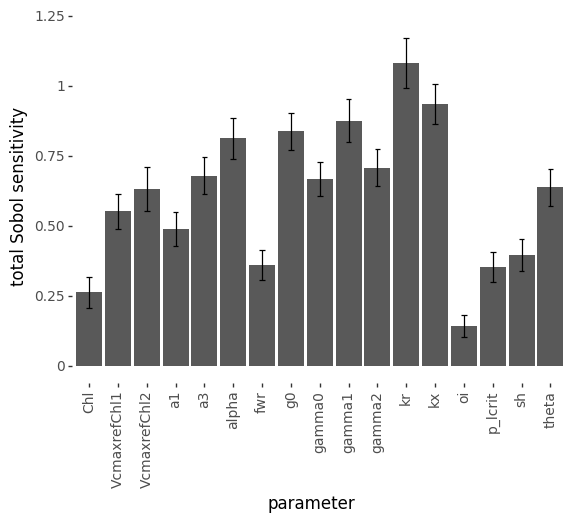

<ggplot: (8732988183673)>

In [31]:

addToName = repr(10)+"_"+repr(21)+"_"+"dry"
with open('sobolPhoto4/Siag_R'+addToName+'.pkl','rb') as f:
    allS = pickle.load(f)
    Siev = allS['ST']
    Sievconf = allS['ST_conf']
#Siev = Siev.T

df = pd.DataFrame(np.array([Siev]), columns =['Chl','oi','fwr','sh','p_lcrit',
              'VcmaxrefChl1', 'VcmaxrefChl2',
             'a1','a3', 'alpha','theta',
             'gamma0', 'gamma1', 'gamma2','g0',
             'kr','kx'])
#Sievconf = Sievconf.T

df_conf = pd.DataFrame(np.array([Sievconf]), columns =['Chl','oi','fwr','sh','p_lcrit',
              'VcmaxrefChl1', 'VcmaxrefChl2',
             'a1','a3', 'alpha','theta',
             'gamma0', 'gamma1', 'gamma2','g0',
             'kr','kx'])
df
dfmean = pd.DataFrame(data=df.mean(),columns=["mean"])
dfmean["maxst"] = (df + df_conf).max()
dfmean["minst"] = (df - df_conf).min()
dfmean['variables']=dfmean.index
dfmeanEv = dfmean
dfmeanEv


(
    ggplot(dfmeanEv)  # What data to use
    + aes(x='variables', y= "mean" )  # What variable to use
    + geom_bar(stat = "identity")  # Geometric object to use for drawing
    + xlab("parameter")
    + ylim(0,1.2)
    + geom_errorbar(aes(ymin="minst", ymax="maxst"), width=.2) 
    + ylab("total Sobol sensitivity")
    +theme(legend_text = element_text( size=10),
        legend_title = element_text( size=10),
        legend_position="bottom",#c(0.5,0.1),
        #legend.direction = "horizontal",
        legend_box = "vertical",
        panel_grid_minor = element_line(colour="white"),
        panel_grid_major = element_line(colour="white"),
        panel_background = element_rect(fill="white", color="black"),
        strip_text_y =element_text( size=10) ,
        axis_text_x =element_text(angle = 90, size=10) ,
        axis_text = element_text( size=10),
        axis_title = element_text( size=12)) 
)

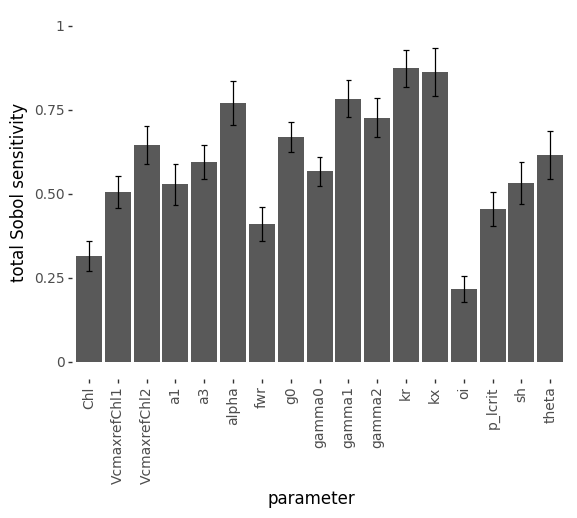

<ggplot: (8732988607922)>

In [25]:

addToName = repr(11)+"_"+repr(7)+"_"+"wet"
with open('sobolPhoto4/Siag_R'+addToName+'.pkl','rb') as f:
    allS = pickle.load(f)
    Siev = allS['ST']
    Sievconf = allS['ST_conf']
#Siev = Siev.T

df = pd.DataFrame(np.array([Siev]), columns =['Chl','oi','fwr','sh','p_lcrit',
              'VcmaxrefChl1', 'VcmaxrefChl2',
             'a1','a3', 'alpha','theta',
             'gamma0', 'gamma1', 'gamma2','g0',
             'kr','kx'])
#Sievconf = Sievconf.T

df_conf = pd.DataFrame(np.array([Sievconf]), columns =['Chl','oi','fwr','sh','p_lcrit',
              'VcmaxrefChl1', 'VcmaxrefChl2',
             'a1','a3', 'alpha','theta',
             'gamma0', 'gamma1', 'gamma2','g0',
             'kr','kx'])
dfmean = pd.DataFrame(data=df.mean(),columns=["mean"])
dfmean["maxst"] = (df + df_conf).max()
dfmean["minst"] = (df - df_conf).min()
dfmean['variables']=dfmean.index
dfmeanEv = dfmean
dfmeanEv


(
    ggplot(dfmeanEv)  # What data to use
    + aes(x='variables', y= "mean" )  # What variable to use
    + geom_bar(stat = "identity")  # Geometric object to use for drawing
    + xlab("parameter")
    + ylim(0,1)
    + geom_errorbar(aes(ymin="minst", ymax="maxst"), width=.2) 
    + ylab("total Sobol sensitivity")
    +theme(legend_text = element_text( size=10),
        legend_title = element_text( size=10),
        legend_position="bottom",#c(0.5,0.1),
        #legend.direction = "horizontal",
        legend_box = "vertical",
        panel_grid_minor = element_line(colour="white"),
        panel_grid_major = element_line(colour="white"),
        panel_background = element_rect(fill="white", color="black"),
        strip_text_y =element_text( size=10) ,
        axis_text_x =element_text(angle = 90, size=10) ,
        axis_text = element_text( size=10),
        axis_title = element_text( size=12)) 
)

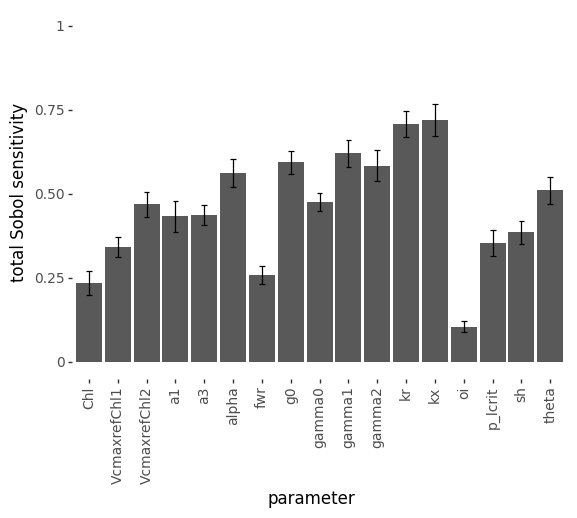

<ggplot: (8732988455584)>

In [27]:

addToName = repr(11)+"_"+repr(7)+"_"+"dry"
with open('sobolPhoto4/Siag_R'+addToName+'.pkl','rb') as f:
    allS = pickle.load(f)
    Siev = allS['ST']
    Sievconf = allS['ST_conf']
#Siev = Siev.T

df = pd.DataFrame(np.array([Siev]), columns =['Chl','oi','fwr','sh','p_lcrit',
              'VcmaxrefChl1', 'VcmaxrefChl2',
             'a1','a3', 'alpha','theta',
             'gamma0', 'gamma1', 'gamma2','g0',
             'kr','kx'])
#Sievconf = Sievconf.T

df_conf = pd.DataFrame(np.array([Sievconf]), columns =['Chl','oi','fwr','sh','p_lcrit',
              'VcmaxrefChl1', 'VcmaxrefChl2',
             'a1','a3', 'alpha','theta',
             'gamma0', 'gamma1', 'gamma2','g0',
             'kr','kx'])
dfmean = pd.DataFrame(data=df.mean(),columns=["mean"])
dfmean["maxst"] = (df + df_conf).max()
dfmean["minst"] = (df - df_conf).min()
dfmean['variables']=dfmean.index
dfmeanEv = dfmean
dfmeanEv


(
    ggplot(dfmeanEv)  # What data to use
    + aes(x='variables', y= "mean" )  # What variable to use
    + geom_bar(stat = "identity")  # Geometric object to use for drawing
    + xlab("parameter")
    + ylim(0,1)
    + geom_errorbar(aes(ymin="minst", ymax="maxst"), width=.2) 
    + ylab("total Sobol sensitivity")
    +theme(legend_text = element_text( size=10),
        legend_title = element_text( size=10),
        legend_position="bottom",#c(0.5,0.1),
        #legend.direction = "horizontal",
        legend_box = "vertical",
        panel_grid_minor = element_line(colour="white"),
        panel_grid_major = element_line(colour="white"),
        panel_background = element_rect(fill="white", color="black"),
        strip_text_y =element_text( size=10) ,
        axis_text_x =element_text(angle = 90, size=10) ,
        axis_text = element_text( size=10),
        axis_title = element_text( size=12)) 
)

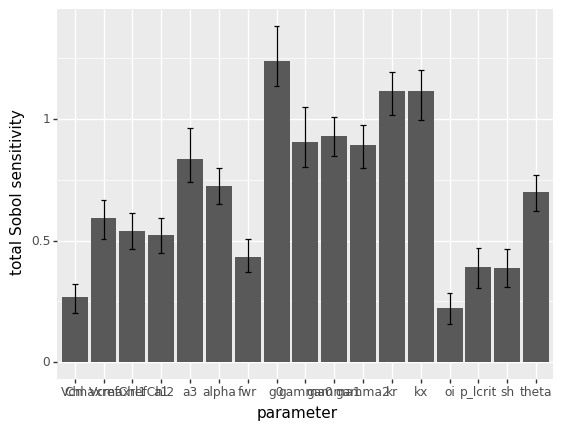

<ggplot: (8781413643677)>

In [108]:

(
    ggplot(dfmeanVj)  # What data to use
    + aes(x='variables', y= "mean" )  # What variable to use
    + geom_bar(stat = "identity")  # Geometric object to use for drawing
    + xlab("parameter")
    + geom_errorbar(aes(ymin="minst", ymax="maxst"), width=.2) 
    + ylab("total Sobol sensitivity")
)

In [109]:
Sic = np.array([np.full(17,0.) for i in range(maxrun)])
for i in range(maxrun):
    with open('Siev_'+repr(i)+'.pkl','rb') as f:
         Sic[i][:] = pickle.load(f)['ST_conf']
Sict = Sic.T
df_conf = pd.DataFrame(Sic, columns =['Chl','oi','fwr','sh','p_lcrit',
              'VcmaxrefChl1', 'VcmaxrefChl2',
             'a1','a3', 'alpha','theta',
             'gamma0', 'gamma1', 'gamma2','g0',
             'kr','kx']) 

dfmean = pd.DataFrame(data=df_mean.mean(),columns=["mean"])
dfmean["maxst"] = (df_mean + df_conf).max()
dfmean["minst"] = (df_mean - df_conf).min()
dfmean['variables']=dfmean.index
dfmeanEv = dfmean

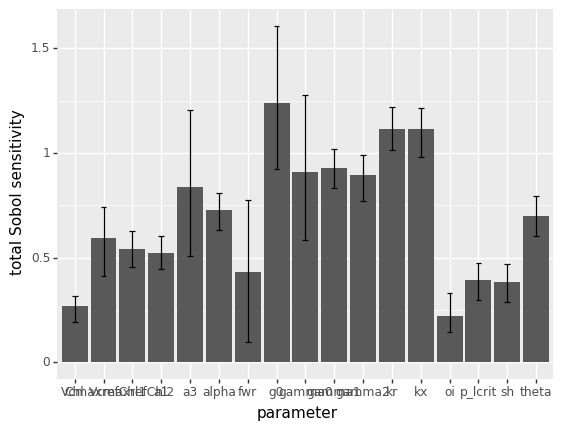

<ggplot: (8781414059427)>

In [110]:
(
    ggplot(dfmeanEv)  # What data to use
    + aes(x='variables', y= "mean" )  # What variable to use
    + geom_bar(stat = "identity")  # Geometric object to use for drawing
    + xlab("parameter")
    + geom_errorbar(aes(ymin="minst", ymax="maxst"), width=.2) 
    + ylab("total Sobol sensitivity")
)

In [111]:
Sic = np.array([np.full(17,0.) for i in range(maxrun)])
for i in range(maxrun):
    with open('Sij_'+repr(i)+'.pkl','rb') as f:
         Sic[i][:] = pickle.load(f)['ST_conf']
Sict = Sic.T
df_conf = pd.DataFrame(Sic, columns =['Chl','oi','fwr','sh','p_lcrit',
              'VcmaxrefChl1', 'VcmaxrefChl2',
             'a1','a3', 'alpha','theta',
             'gamma0', 'gamma1', 'gamma2','g0',
             'kr','kx']) 

dfmean = pd.DataFrame(data=df_mean.mean(),columns=["mean"])
dfmean["maxst"] = (df_mean + df_conf).max()
dfmean["minst"] = (df_mean - df_conf).min()
dfmean['variables']=dfmean.index
dfmeanVc = dfmean

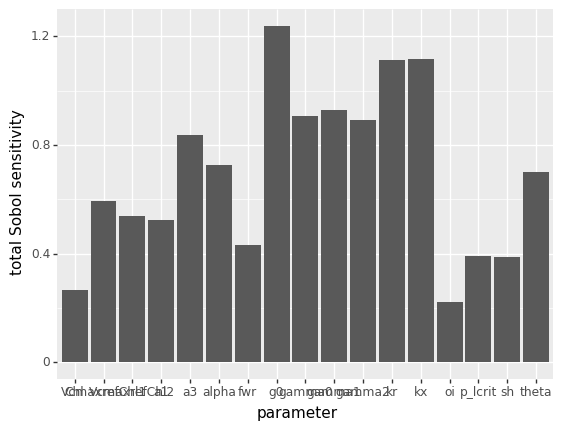

<ggplot: (8781414072823)>

In [113]:
(
    ggplot(dfmeanVc)  # What data to use
    + aes(x='variables', y= "mean" )  # What variable to use
    + geom_bar(stat = "identity")  # Geometric object to use for drawing
    + xlab("parameter")
    #+ geom_errorbar(aes(ymin="minst", ymax="maxst"), width=.2) 
    + ylab("total Sobol sensitivity")
)